# assignment_numpy

# Project: Image manipulation in Numpy

## Overview

In this exercise, you should look for an image that you will use to do some manipulations with. It is highly important that you do all your image manipulations using the raw image data in Numpy (and do not use the PIL object). You can find in the following location an example of a notebook where we used Numpy for image manipulation: 

`Dropbox/Syntra/slides/chapter09 Numpy/motiverend voorbeeld`

## Detailed assignment

**Assignment: Setting Up Project and Developing a Production Simulation Program**

In this assignment, you will follow a series of steps to set up a project structure, manage version control using Git, create a virtual environment with Anaconda, and develop a Python program for image manipulation

**Step 1: Initialize Git Repository**

Initialize a git repository on your personal GitHub account to track changes and collaborate effectively. You can add the data into this git repo.

**Step 2: Create Virtual Environment with Anaconda**

Utilize Anaconda to establish a virtual environment for your project. Ensure that you install only the necessary packages required for the project.

**Step 3: Choose & load image**

Choose an image that you want to do the manipulations for. Use the following code to read in this image and get the underlying numpy object.

In [1]:
# import packages
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# load image and convert to numpy array
loc_input_img = os.path.join('..', 'data', 'input', 'gekkie.jpg')
img = Image.open(loc_input_img)
np_image = np.array(img)

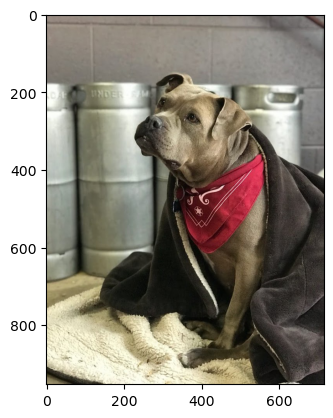

In [3]:
# display image
plt.imshow(np_image)
plt.show()

**Step 4: Do my image manipulations**

Use Numpy to create all of the following manipulated versions of the original image:

<div style="text-align:center">
  <img src="../data/input/image_manip1.png" alt="Manip1">
</div>

<div style="text-align:center">
  <img src="../data/input/image_manip2.png" alt="Manip2">
</div>

<div style="text-align:center">
  <img src="../data/input//image_manip3.png" alt="Manip3">
</div>

#### Recreate first image

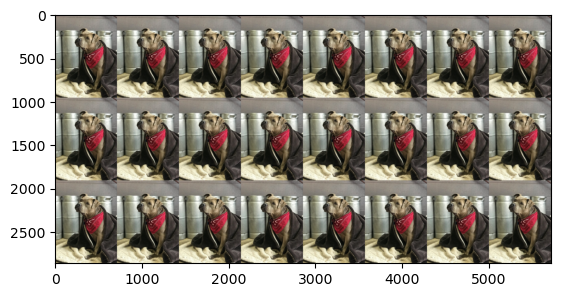

In [4]:
# Visualize 3 by 8
full_image = np.tile(np_image, (3, 8, 1))
plt.imshow(full_image) 
plt.show()

#### Recreate second image

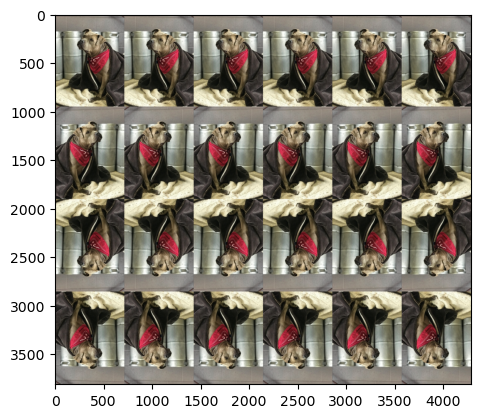

In [5]:
# Flip array to mirror the original
mirrored_image = np.flip(np_image, axis=1)

# Flip rgb_array so that it is upside down
upside_down_image = np.flip(np_image, axis=0)

# mirror the upside down image
upside_down_mirror_image = np.flip(np_image, axis=(0,1))

# Create a list of images
images = [np_image, mirrored_image, upside_down_image, upside_down_mirror_image]

# Use np.tile to repeat each image 6 times horizontally and stack them vertically
full_image = np.vstack([np.tile(image, (1, 6, 1)) for image in images])

plt.imshow(full_image)
plt.show()

#### Recreate third image

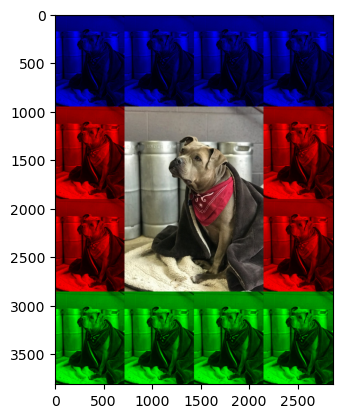

In [6]:
# Create a copy of the original image and set the appropria RGB channel
image_R = np_image.copy()
image_R[:, :, (1, 2)] = 0

image_G = np_image.copy()
image_G[:, :, (0, 2)] = 0

image_B = np_image.copy()
image_B[:, :, (0, 1)] = 0

# Create a bigger image by repeating the original image twice in both dimensions
bigger_image = np_image.repeat(2, axis=0).repeat(2, axis=1)

# Slice the bigger image into 4 equal pieces
piece1 = bigger_image[:bigger_image.shape[0]//2, :bigger_image.shape[1]//2]
piece2 = bigger_image[:bigger_image.shape[0]//2, bigger_image.shape[1]//2:]
piece3 = bigger_image[bigger_image.shape[0]//2:, :bigger_image.shape[1]//2]
piece4 = bigger_image[bigger_image.shape[0]//2:, bigger_image.shape[1]//2:]

sliced_images = [piece1, piece2, piece3, piece4]

# Create the rows of the final image
row_1 = np.hstack([image_B,image_B,image_B,image_B])
row_2 = np.hstack([image_R,piece1,piece2,image_R])
row_3 = np.hstack([image_R,piece3,piece4,image_R])
row_4 = np.hstack([image_G,image_G,image_G,image_G])

# Create the final image by vertically stacking the four rows
full_image = np.vstack([row_1, row_2, row_3, row_4])

plt.imshow(full_image)
plt.show()

**Step 5: Generalize these manipulations**
Generalize the image manipulations that you created in **Step 4**, generalize to the following (or even more general if you want):
 - Define a function `grid_with_flips(image, matrix)`, where `matrix` is a matrix containing the type of flips that you do with your image. You could say `0` for you image not flipped, `1` for flipping your image left right, `2` for flipping it upside down and `3` for flipping it both left right and upside down. For example the two images you created in **Step 4** would be the result of using the matrix: `[[1 for i in range(7)] for j in range(3)]` and `[[j for i in range(7)] for j in range(4)]`.
 - Define a function `create_colorful_big_one(colors)` where `colors` is a list of colors (starting left top and rotating clockwise). The image from `Step 4` is the result of calling the function `create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])`.

 Can you also think of a way in which you could combine these two functions to create a single function that allows you to create (a combination of) the above manipulations?

 ***Remark:*** While I talk about "a single function", it is *not* best practice to create one single function containing all code, but rather create many small functions which are all combined in other function(s). Each function should do one thing, and your final function should simply combine those functionalities based on your input.

Replace the code your wrote in **Step 4** by 3 simple function calls from the function(s) you defined in this step. Please also make sure to organize & document your code after completing this part.

In [22]:
def grid_with_flips(image = np_image, matrix = [[1 for i in range(4)] for j in range(3)]):
    """
    Concatenates the given image based on the input flip matrix.

    Parameters:
    image (numpy.ndarray): The input image to be concatenated. Defaults to np_image if no image is provided.
    matrix (list): The matrix specifying the type of flips to be performed on each image. Defauls to [[1 for i in range(4)] for j in range(3)] if no matrix is provided.

    Returns:
    numpy.ndarray: The concatenated image.

    Raises:
    ValueError: If an invalid flip matrix is provided.
    """

    # Define a dictionary to map flip types to their corresponding operations
    flip_dict = {0: lambda x: x, 1: lambda x: np.flip(x, axis=1), 2: lambda x: np.flip(x, axis=(0, 1)), 3: lambda x: np.flip(x, axis=0)}

    # Check if the flip matrix is valid
    if not all(flip_type in flip_dict for row in matrix for flip_type in row):
        raise ValueError("Invalid flip matrix. Each element should be 0, 1, 2, or 3.")
    if not all(len(row) == len(matrix[0]) for row in matrix):
        raise ValueError("The matrix does not have equal length rows.")
    
    # Use list comprehension and the flip_dict to flip the images according to the flip matrix
    flipped_images = [[flip_dict[flip_type](image) for flip_type in row] for row in matrix]

    # Concatenate the images horizontally and vertically
    full_image = np.concatenate([np.concatenate(row, axis=1) for row in flipped_images], axis=0)

    plt.imshow(full_image)
    plt.show()

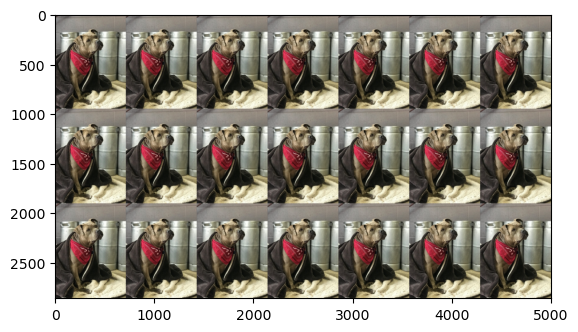

In [8]:
grid_with_flips(np_image, [[1 for i in range(7)] for j in range(3)])

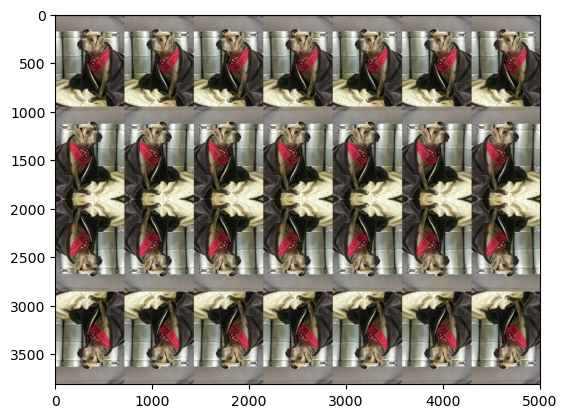

In [9]:
grid_with_flips(np_image,[[j for i in range(7)] for j in range(4)])

In [24]:
def create_colorful_big_one(matrix = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'], np_image=np_image):
    """
    Creates a collection of images whereby each image is mapped to a color input (red, blue, or green) which will surround the original image.
    Args:
        matrix (list): The matrix containing a list of colors starting left top and rotating clockwise. Defaults to ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'].
        np_image (numpy.ndarray, optional): The original image as a numpy array. Defaults to np_image.

    Raises:
        ValueError: If an invalid color code is encountered or if the length of the input color matrix is not 12.

    Returns:
        Displays the final image created from the color matrix.
    """

    # Check if the length of the matrix is 12
    if len(matrix) != 12:
        raise ValueError("Invalid matrix length. Please provide a list of 12 colors.")


    # Define the middle matrix containing the sections of the middle image
    middle_matrix = ['p1','p2','p3','p4']

    # Rearrange the matrix elements to desired pattern
    new_matrix = matrix[:4] + [matrix[-1]] + middle_matrix[0:2] + [matrix[4]] + [matrix[-2]] + middle_matrix[2:4] + [matrix[5]] + matrix[6:10][::-1]

    # Reshape the matrix to a 4x4 matrix
    new_matrix = np.reshape(new_matrix, (4, 4)).tolist()

    # Create copies of the original image with specific color channels
    image_R = np_image.copy()
    image_R[:, :, (1, 2)] = 0
    image_G = np_image.copy()
    image_G[:, :, (0, 2)] = 0
    image_B = np_image.copy()
    image_B[:, :, (0, 1)] = 0

    # Resize original image and split into four pieces
    bigger_image = np_image.repeat(2, axis=0).repeat(2, axis=1)

    half_width, half_height = bigger_image.shape[0]//2, bigger_image.shape[1]//2

    piece1 = bigger_image[:half_width, :half_height]
    piece2 = bigger_image[:half_width, half_height:]
    piece3 = bigger_image[half_width:, :half_height]
    piece4 = bigger_image[half_width:, half_height:]

   
    # Create a dictionary mapping color codes to their corresponding images
    color_dict = {
        'r': image_R, 
        'g': image_G,  
        'b': image_B,  
        'p1': piece1,  
        'p2': piece2,  
        'p3': piece3,  
        'p4': piece4   
        }   

    # Each color code in the new_matrix is replaced with its corresponding image from the color_dict
    color_images = [[color_dict[color].copy() for color in row] for row in new_matrix]

    # Concatenate the images in the color_images list to create a single image
    color_images = np.concatenate([np.concatenate(row, axis=1) for row in color_images], axis=0)

    # Display the final image
    plt.imshow(color_images)
    plt.show()

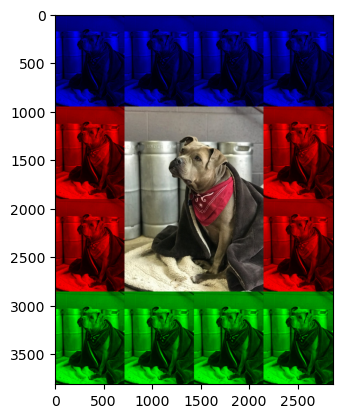

In [11]:
create_colorful_big_one(['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'])

**Step 6: Your own manipulations**

Choose 2 more ways in which you manipulate your image and implement them.

In [26]:
def add_rainbow(image = np_image, border_thickness = 10):
    """
    Adds a rainbow border to an image.

    Parameters:
    image (numpy.ndarray): The input image. Defaults to np_image.
    border_thickness (int, optional): The thickness of the borders. Defaults to 10. Should not exceed 1000.

    Returns:
    input image surrounded by a colorfull rainbow.
    """

    # Create a copy of the image
    im_with_borders = np.copy(image)

    # Define the colors for each border
    border_colors = [
        (148, 0, 211),  # Violet
        (75, 0, 130),   # Indigo
        (0, 0, 255),    # Blue
        (0, 255, 0),    # Green
        (255, 255, 0),  # Yellow
        (255, 127, 0),  # Orange
        (255, 0, 0)     # Red
    ]

    # Check if border_thickness is larger than 1000
    if border_thickness > 1000:
        raise ValueError("border_thickness should not be larger than 1000.")


    # Draw multiple borders outside the image
    for i in range(len(border_colors)):
        # Select the color for the current border. If there are more borders than colors, colors are reused.
        border_color = border_colors[i % len(border_colors)]
    
        # The size of the new image is increased by 2 * border_thickness on both dimensions to accommodate the new border.
        border = np.full((im_with_borders.shape[0] + 2 * border_thickness, im_with_borders.shape[1] + 2 * border_thickness, 3), border_color, dtype=np.uint8)
    
        # Place the original image (or the image with the previously added borders) in the center of the new image.
        border[border_thickness:-border_thickness, border_thickness:-border_thickness] = im_with_borders
    
        # Update the image with the newly created image. This image will be used in the next iteration of the loop to add the next border.
        im_with_borders = border

    # Display the image with borders
    plt.imshow(im_with_borders)
    plt.show()

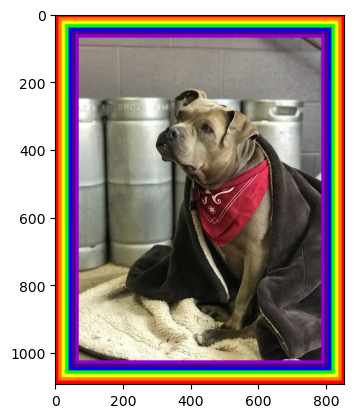

In [13]:
add_rainbow(np_image)

In [14]:
def rainbowify_image(image = np_image):
    """
    Blends the image together with a rainbow gradient and displays the result.

    Parameters:
    image (numpy.ndarray): The input image. Defaults to np_image.

    Returns:
    image overlayed with a rainbow gradient
    """

    # Load the second image
    rainbow = np.array(Image.open('../data/input/rainbow.jpg').resize(image.shape[1::-1]))

    # Blend the images, the * 0.5 multiplies each pixel value of both images by 0.5, effectively reducing their intensity by half.
    overlay = np.clip(image * 0.5 + rainbow * 0.5 , 0, 255).astype(np.uint8)  # The np.clip() function is used to ensure that the pixel values stay within the range of 0 to 255.

    # Display the blended image
    plt.imshow(overlay)
    plt.show()

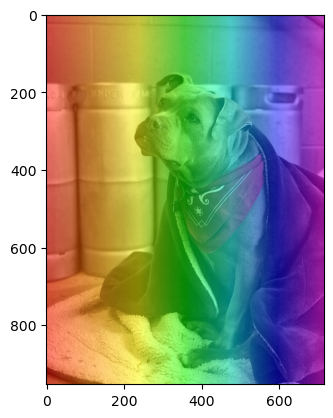

In [15]:
rainbowify_image(np_image)

**Step 7: Share your solution**

Compose a *README.md* file to document and guide users through your project. Include clear instructions on setting up the project, and executing the simulation. Provide concise explanations of the project structure and include an environment *YAML* file that I can use to setup a virtual environment.

By completing these steps, you trained the following skills:
 - Create a well organized codebase that allows for collaboration.
 - Learn to work with Numpy array objects.
 - Creation of general functions that can perform custom manipulations.